## Instruksi
1. Copy colab file ke drive masing-masing
1. Rename file colab dengan format : NAMA_LENGKAP_DATASET.ipynb
1. Lengkapi bagian kode
1. Berikan dokumentasi pada setiap cell kode
---

### Import Seluruh Kebutuhan Library

In [47]:
# kode
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

import matplotlib as mpl

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0



Matplotlib version:  3.0.3


### Load Dataset dan Tampilkan Isi Data
* load data dapat dilakukan melalui unggah file lokal maupun unduh data dari url ([contoh](https://colab.research.google.com/drive/1YP6BQpJKotuR61vPdv4-Ap-oFdqhDuJj))
* print standar, maupun menggunakan pandas

In [48]:
"""
 meload data pada file lokal titanic.csv yang dan membuatnya dataframe df. 
 df.head diggunakan untuk menampilkan data 5 teratas dan melihatnya apakah sudah benar dan layak digunakan
  
"""
df = pd.read_csv("titanic.csv")

# take a look at the dataset
df.head()
# kode





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Praproses Data
* cek jika terdapat record / field yang tidak layak dipakai
* lakukan praproses terhadap data-data tersebut

In [49]:
"""
 menampilkan jumlah data dengan df.head 
 mengecek jumlah data .info
 mencari nilai mean .describe
 mema,bahkan nilai mean kedalam age karena jumlah data yang kurang diambil datri 
  nilai mean semua data 
 merubah nilai sex dengan cara mapping dengan male 0 dan female 1
 
 membuat nilai X d'PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare']]
dan nilai y 'Survived'
kemudia di shape
  
"""

# kode
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
df.drop(columns=['Cabin','Ticket','Embarked'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [0]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [56]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare'],
      dtype='object')

In [0]:
X = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare']]
y= df['Survived']

In [58]:
print(X.shape)
print(y.shape)

(891, 7)
(891,)


### Visualisasikan Data
* Tampilkan visualisasi sederhana seperti plot, barchart, dll. [*hint*](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html)

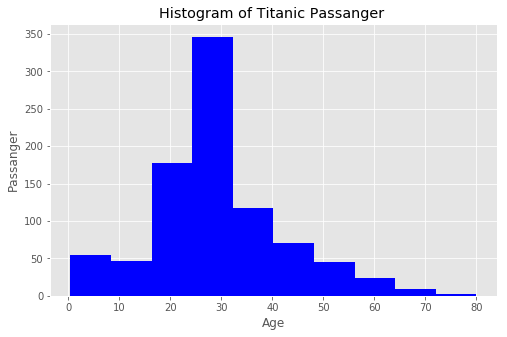

In [70]:
"""
memvisualisaikan data dalam bentuk histogram dengan melihat korelasi  antara
jumlah umur penumpang
"""


df['Age'].plot(kind='hist', figsize=(8, 5), color='blue')

plt.title('Histogram of Titanic Passanger ') # add a title to the histogram
plt.ylabel('Passanger') # add y-label
plt.xlabel('Age') # add x-label

plt.show()

### Bagi Data
* bagi data menjadi data latih dan data uji 
* pembagian membagi variabel data dan label
* bisa menggunakan library sklearn

In [0]:
"""
 membagi data uji dan data test sebanyak 80% dan data test 20%
  
"""

# kode

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size = 0.2)




In [82]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

712
179
712
179


### Latih Model Pembelajaran Mesin
* Gunakan classifier yang sesuai dengan yang diperintahkan dalam [***project description***](https://drive.google.com/open?id=158T8j6uasWUfb-O9ta9l8PayIllwWcax).

In [0]:
"""
 mengolah data test yang diambil dari nilai X kemudia di lihat lagi apakah 
 jumlah datanya sama atau tudak jika tidak maka akan dilakukan normalilsasi
 data lagi,,
 disini 
  
"""

# kode

X_train 
y_train
X_test = X_test[['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

X_test.Age.fillna(X_test.Age.mean(), inplace=True)
X_test.Fare.fillna(X_test.Fare.mean(), inplace=True)






In [81]:
len(X_test)

179

In [62]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500


### Uji Hasil Model
* Gunakan model yang telah kalian latih untuk melakukan prediksi menggunakan data uji.

In [84]:
"""
  data telah jadi dan sama maka dilakukan fit sebelum di predict
  menggunakan library linier model menggunakan data train
  
"""

# kode
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(X_train, y_train)





/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Evaluasi Performa: Confusion Matrix
* Tampilkan evaluasi performa dari model yang dibangun menggunakan [***Confusion Matrix***](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [0]:
"""
  mengolah data menjaidi Y pred dari data X test menggunakan library data logistic
  model
  
"""

# kode
y_pred = log_model.predict(X_test)




In [75]:
len(y_pred)

891

### Evaluasi Performa: Akurasi dan F1 Score
* Tampilkan evaluasi performa dari model yang dibangun menggunakan [**Akurasi**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) dan [**F1 Score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [94]:
"""
  melihat data dengan akurasi dengan MAE,
  MSE dan R 2 score
  serta hasil dari accuracy adalah 0.79 
  dan hasil dari F1 Score adalah 0,74 
  maka model diatas lumyan bagus untuk digunakan dalam menganalis 
  keselamatan penumpang pada kapal titanic
  
"""

# kode
from sklearn.metrics import mean_absolute_error,accuracy_score, f1_score


print("Mean absolute error: %.2f" % mean_absolute_error(y_pred, y_test))
print("Test set Accuracy: ", accuracy_score(y_pred, y_test))
print("F1 Score: ", f1_score(y_pred, y_test))





Mean absolute error: 0.21
Test set Accuracy:  0.7932960893854749
F1 Score:  0.7482993197278912


### Visualisasi Hasil dan Performa
* Tampilkan visualisasi performa dari model yang dibuat

In [0]:
"""
  dalam visualisasi ini saya belum tahu 
  
"""

# kode
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


